# First Programming Question

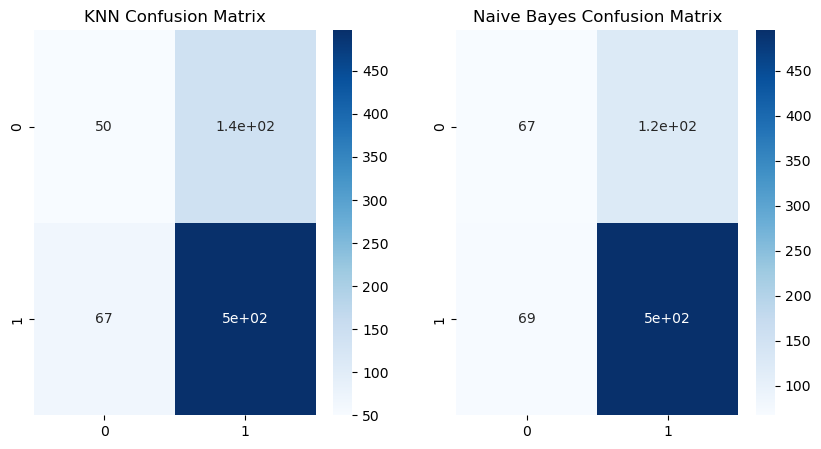

In [21]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from scipy.io.arff import loadarff

# Load data
data = loadarff('data/pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

# Create 10-fold stratified cross validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Create classifiers
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
nb = GaussianNB()

KNN_CONFUSION_MATRIX = np.zeros((2, 2))
NB_CONFUSION_MATRIX = np.zeros((2, 2))

def fold_handle(train_index, test_index):
    global KNN_CONFUSION_MATRIX, NB_CONFUSION_MATRIX
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)
    nb.fit(X_train, y_train)

    KNN_CONFUSION_MATRIX += confusion_matrix(y_test, knn.predict(X_test))
    NB_CONFUSION_MATRIX += confusion_matrix(y_test, nb.predict(X_test))

for train_index, test_index in skf.split(X, y):
    fold_handle(train_index, test_index)

# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.heatmap(KNN_CONFUSION_MATRIX, annot=True, cmap='Blues', ax=ax1)
p2 = sns.heatmap(NB_CONFUSION_MATRIX, annot=True, cmap='Blues', ax=ax2)
p1.set_title('KNN Confusion Matrix')
p2.set_title('Naive Bayes Confusion Matrix')

plt.show(p1)

# Second Programming Question